# Introduction 

For the purpose of this project, the following questions will be explored:

What are typical wind conditions at Irish airports?

Airports that will be looked at in this project:

- Dublin __(DUB)__

- Shannon __(SNN)__

- Cork __(ORK)__

- Knock __(NOC)__


## Aquiring the datasets.

Import Libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from windrose import WindroseAxes
import matplotlib.pyplot as plt
from datetime import datetime
import calendar

Read in the CSV Files for the four airports and name the dataframes accordingly. Skip Meta data using skiprows and format. Parse the first column as date and set it as the index. Format the date as well for readability.

In [84]:
# Load the Shannon airport dataset.

shannon = pd.read_csv("data/dly518.csv", parse_dates=["date"], index_col='date', skiprows=24,low_memory=False, date_format='%d-%b-%y')


In [85]:
# load the Dublin airport dataset.

dublin = pd.read_csv("data/dly532.csv", parse_dates=["date"], index_col='date', skiprows=25, low_memory=False, date_format='%d-%b-%y')

In [86]:
# Load the Cork airport dataset.

cork = pd.read_csv("data/dly3904.csv", parse_dates=["date"], index_col='date', skiprows=24,low_memory=False, date_format='%d-%b-%y')

In [87]:
# Load the Knock airport dataset.

knock = pd.read_csv("data/dly4935.csv", parse_dates=["date"], index_col='date', skiprows=24, low_memory=False, date_format='%d-%b-%y')

Check the datasets load correctly by checking the first few rows. 

In [88]:
shannon.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Sept-45,0,19.2,0,14.4,0,13.6,0,0.2,1013.8,12.0,...,0,27,1.6,0,,1.6,2.3,,,
02-Sept-45,0,20.7,0,14.8,0,13.4,3,0.0,1018.2,7.3,...,0,16,9.3,0,,2.5,3.5,,,
03-Sept-45,0,23.3,0,11.8,0,9.6,3,0.0,1021.2,4.2,...,0,12,11.4,0,,2.9,3.9,,,
04-Sept-45,0,21.6,0,9.4,0,6.7,3,0.0,1024.2,6.2,...,0,18,5.3,0,,2,2.7,,,
05-Sept-45,0,21.3,0,12.2,0,11.3,3,0.0,1024.9,4.9,...,0,13,3.6,0,,1.8,2.4,,,


In [89]:
dublin.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Jan-42,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,17.2,...,,0.0,0,,,1.1,1.4,,,
02-Jan-42,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,15.2,...,,0.0,0,,,0.7,0.9,,,
03-Jan-42,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,14.0,...,,0.1,0,,,0.5,0.6,,,
04-Jan-42,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,17.0,...,,0.6,0,,,0.6,0.7,,,
05-Jan-42,0,3.5,1,-0.8,0,0,0,0.6,1013.4,13.0,...,,3.4,0,,,0.6,0.7,,,


In [90]:
cork.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Jan-62,0,2.8,1,-2.5,,,8,,999.6,9.2,...,0,24,,0,,,,,,
02-Jan-62,0,2.8,1,-3.7,,,8,,1005.8,5.9,...,0,10,,0,,,,,,
03-Jan-62,0,2.3,1,-3.8,,,8,,1007.8,6.7,...,0,13,,0,,,,,,
04-Jan-62,0,6.6,0,0.6,,,8,,1007.8,4.5,...,0,12,,0,,,,,,
05-Jan-62,0,9.3,0,0.6,,,8,,1002.2,12.7,...,0,29,,0,,,,,,


In [91]:
knock.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Aug-96,4,,4,,,,8,,,,...,1,,1.1,0,,,,,,
02-Aug-96,0,15.1,0,9.2,,,0,0.3,999.2,7.7,...,0,18,,0,,,,,,
03-Aug-96,0,18,0,11.6,0,11.4,0,0,1002.1,6.6,...,0,18,5.7,0,15.6,2.7,3.7,2.7,2.7,2.7
04-Aug-96,0,20.4,0,9.6,0,8.6,0,0.1,991.7,11.3,...,0,32,6.8,0,15.975,3.7,5,6.2,6.2,6.3
05-Aug-96,0,13.7,0,8.7,0,10.9,0,13.3,983.8,7.8,...,0,24,0,0,14.625,1.1,1.8,0,-6.1,-5.9


## Cleaning the datasets.

Combine the four airport datasets into one Dataframe to create comparrison plots. Need to create a Column for the airport names to be stored. This can be acheived using pandas.concat. It will take the multiple dataframes and stick them together.

In [92]:
# Store the four airport DataFrames into a single DF. Adsd an Airport column.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

all_airports = pd.concat([
    shannon.assign(Airport='Shannon'),
    dublin.assign(Airport='Dublin'),
    cork.assign(Airport='Cork'),
    knock.assign(Airport='Knock')
], axis=0)

# Move Airport column to front for readability.
# See: https://stackoverflow.com/questions/21415661/pandas-move-column-to-first-position-in-dataframe

all_airports = all_airports[['Airport'] + [c for c in all_airports.columns if c != 'Airport']]




# Check
all_airports.head()


,Airport,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd,g_rad
date,,,,,,,,,,,,,,,,,,,,,
01-Sept-45,Shannon,0,19.2,0,14.4,0,13.6,0,0.2,1013.8,...,27,1.6,0,,1.6,2.3,,,,NaN
02-Sept-45,Shannon,0,20.7,0,14.8,0,13.4,3,0.0,1018.2,...,16,9.3,0,,2.5,3.5,,,,NaN
03-Sept-45,Shannon,0,23.3,0,11.8,0,9.6,3,0.0,1021.2,...,12,11.4,0,,2.9,3.9,,,,NaN
04-Sept-45,Shannon,0,21.6,0,9.4,0,6.7,3,0.0,1024.2,...,18,5.3,0,,2,2.7,,,,NaN
05-Sept-45,Shannon,0,21.3,0,12.2,0,11.3,3,0.0,1024.9,...,13,3.6,0,,1.8,2.4,,,,NaN


Need to move the date column to match the rest of the columns.

In [93]:
# move date index to a column.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

all_airports = all_airports.reset_index()
all_airports.head()


,date,Airport,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,...,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd,g_rad
0,01-Sept-45,Shannon,0,19.2,0,14.4,0,13.6,0,0.2,...,27,1.6,0,,1.6,2.3,,,,NaN
1,02-Sept-45,Shannon,0,20.7,0,14.8,0,13.4,3,0.0,...,16,9.3,0,,2.5,3.5,,,,NaN
2,03-Sept-45,Shannon,0,23.3,0,11.8,0,9.6,3,0.0,...,12,11.4,0,,2.9,3.9,,,,NaN
3,04-Sept-45,Shannon,0,21.6,0,9.4,0,6.7,3,0.0,...,18,5.3,0,,2,2.7,,,,NaN
4,05-Sept-45,Shannon,0,21.3,0,12.2,0,11.3,3,0.0,...,13,3.6,0,,1.8,2.4,,,,NaN


There is missing values in some of the columns. Replace these with NaN objects.

In [94]:
# Replace blank spaces with NaN values.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

all_airports.replace(to_replace=' ', value=np.nan, inplace=True)

# Check.

all_airports.head()


,date,Airport,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,...,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd,g_rad
0,01-Sept-45,Shannon,0,19.2,0,14.4,0,13.6,0,0.2,...,27,1.6,0,NaN,1.6,2.3,NaN,NaN,NaN,NaN
1,02-Sept-45,Shannon,0,20.7,0,14.8,0,13.4,3,0.0,...,16,9.3,0,NaN,2.5,3.5,NaN,NaN,NaN,NaN
2,03-Sept-45,Shannon,0,23.3,0,11.8,0,9.6,3,0.0,...,12,11.4,0,NaN,2.9,3.9,NaN,NaN,NaN,NaN
3,04-Sept-45,Shannon,0,21.6,0,9.4,0,6.7,3,0.0,...,18,5.3,0,NaN,2,2.7,NaN,NaN,NaN,NaN
4,05-Sept-45,Shannon,0,21.3,0,12.2,0,11.3,3,0.0,...,13,3.6,0,NaN,1.8,2.4,NaN,NaN,NaN,NaN


For the purpose of this project, will be looking at the following columns for analysis.

__Airport - Location of Airport__

__Date - Date data recorded.__

__'wdsp:'   -  Mean Wind Speed (knot)__

__'hm:'    -  Highest ten minute mean wind speed (knot)__

__'ddhm:'   -  Wind Direction at max 10 min. mean (deg)__

__'hg: '   -  Highest Gust (knot)__

First, drop any rows that are missing values.

In [95]:
# Drop rows missing values in 'wdsp' column.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

mean_wind_speed = all_airports[['wdsp']].copy()
mean_wind_speed.isna().sum()
mean_wind_speed.dropna(inplace=True)

# Check.
mean_wind_speed.head()


,wdsp
0,12.0
1,7.3
2,4.2
3,6.2
4,4.9


In [96]:
# Drop rows missing values in 'hm' column.

max_wind_speed = all_airports[['hm']].copy()
max_wind_speed.isna().sum()
max_wind_speed.dropna(inplace=True)

# Check.
max_wind_speed.head()


,hm
0,20
1,12
2,8
3,13
4,9


In [97]:
# Drop rows missing values in 'ddhm' column.

mean_wind_direction = all_airports[['ddhm']].copy()
mean_wind_direction.isna().sum()
mean_wind_direction.dropna(inplace=True)

# Check.
mean_wind_direction.head()


,ddhm
0,90
1,100
2,100
3,310
4,100


In [98]:
# Drop rows missing values in 'hg' column.

max_gust_speed = all_airports[['hg']].copy()
max_gust_speed.isna().sum()
max_gust_speed.dropna(inplace=True)

# Check.
max_gust_speed.head()

,hg
0,27
1,16
2,12
3,18
4,13


Drop the unwanted columns and rename the ones being kept to improve readability.

In [99]:
# drop unwanted columns and rename them.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

all_airports = all_airports[['date', 'Airport','wdsp', 'hm', 'ddhm', 'hg']].rename(columns={
  'date': 'Date',
  'wdsp': 'Mean_Wind_Speed(knots)', 
  'hm': 'Max_Wind_Speed(knots)', 
  'ddhm': 'Mean_Wind_Direction(degrees)', 
  'hg': 'Max_Gust_Speed(knots)'})   

# Check.
all_airports.head()

,Date,Airport,Mean_Wind_Speed(knots),Max_Wind_Speed(knots),Mean_Wind_Direction(degrees),Max_Gust_Speed(knots)
0,01-Sept-45,Shannon,12.0,20,90,27
1,02-Sept-45,Shannon,7.3,12,100,16
2,03-Sept-45,Shannon,4.2,8,100,12
3,04-Sept-45,Shannon,6.2,13,310,18
4,05-Sept-45,Shannon,4.9,9,100,13


In [100]:
# Check the dates have parsed properly.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

all_airports['Date'].dtype

all_airports['Date'] = pd.to_datetime(
    all_airports['Date'],
    format='%d-%b-%y',
    errors='coerce'
)

Set up a function to read in the months as the seasons, this will come in handy when doing seasonal analysis later on.

In [101]:
# Create a function to map month to season.
# https://stackoverflow.com/questions/44124436/python-datetime-to-season

def month_to_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"
    
# Add Season column to all_airports DataFrame.
all_airports['Season'] = all_airports['Date'].dt.month.apply(month_to_season)

# Check.

# month_to_season(1)
# month_to_season(4)
# month_to_season(7)
month_to_season(9)


'Autumn'

## Investigating / Analysising Data

## Intial investigation

__Mean Wind Speed Distribution by Airport__


This boxplot shows the distribution of mean wind speeds (in knots) for Shannon, Dublin, Cork, and Knock airports. It will show how typical wind conditions differ between them.

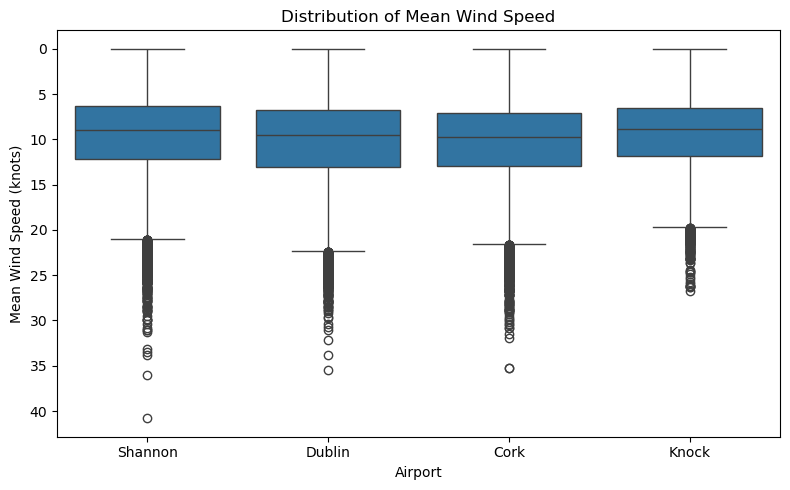

In [102]:
# Boxplot of Mean Wind Speed by Airport.
# See: https://seaborn.pydata.org/generated/seaborn.boxplot.html

plt.figure(figsize=(8, 5))

sns.boxplot(
    data=all_airports,
    x='Airport',
    y='Mean_Wind_Speed(knots)'
)

plt.title('Distribution of Mean Wind Speed')
plt.xlabel('Airport')
plt.ylabel('Mean Wind Speed (knots)')
plt.tight_layout()

# plt.savefig('mean_wind_speed_boxplot.png', dpi=300)

plt.show()



__Median__ wind speed is similar across each of the four airports. 

__Interquartile range__  is also compareable. This suggests that the variability in daily mean wind speeds does not differ that much between the airports.

__Maximum__ observed mean wind speeds (top outliers) are slightly higher for Shannon and Knock, but the difference is not dramatic.

All airports show a number of outliers, representing days with unusually high mean wind speeds—these are likely 
associate.

The overall distribution is slightly right-skewed, with most days experiencing moderate winds and a smaller number of days with much higher wind speeds.


__In Summary__ there are some extreme wind days at each airport, the typical mean wind speeds are very similar for the four airports. This suggests, usually none of the four airports stand out as significantly windier than the others in terms of mean wind speed. However, all are subject to occasional high-wind events.

Extreme Wind & Gust Comparison (Operational risk)
Why

Aviation risk is driven by extremes, not averages.


Violin plot of max gust speed by airport.

Thickness shows frequency

Long tails = more extreme events

Easy airport comparison

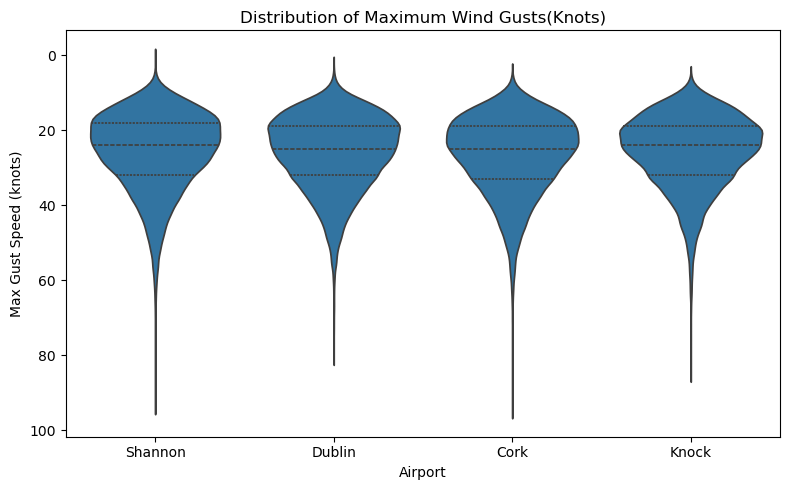

In [103]:
plt.figure(figsize=(8, 5))

sns.violinplot(
    data=all_airports,
    x='Airport',
    y='Max_Gust_Speed(knots)',
    inner='quartile'
)

plt.title('Distribution of Maximum Wind Gusts(Knots)')
plt.xlabel('Airport')
plt.ylabel('Max Gust Speed (knots)')
plt.tight_layout()

# plt.savefig('max_gust_speed_violinplot.png', dpi=300)

plt.show()


 At a quick glance at the Violin plot, the wider sections indicate more common gust speeds, while the long tails represent rare, extreme events.

__Maximum gusts__ mostly fall between 10 and 30 knots for the four airports. They have similar central distributions.


__Median and quartiles__ are closely aligned for all airports, suggesting that typical gust strengths are comparable.

Each airport exhibits a long upper tail, indicating that all experience occasional extreme gusts, sometimes exceeding 60 knots with Shannon and Cork showing a longer tail over Knock and DUblin.


__In Summary__ Maximum wind gusts are generally similar across Shannon, Dublin, Cork, and Knock airports, with most gusts in the 10–30 knot range and occasional extreme events. This highlights that operational risks from wind gusts are present at all airports, and none stands out as significantly more prone to extreme gusts than the others.

Analysis 

Windrose documentation

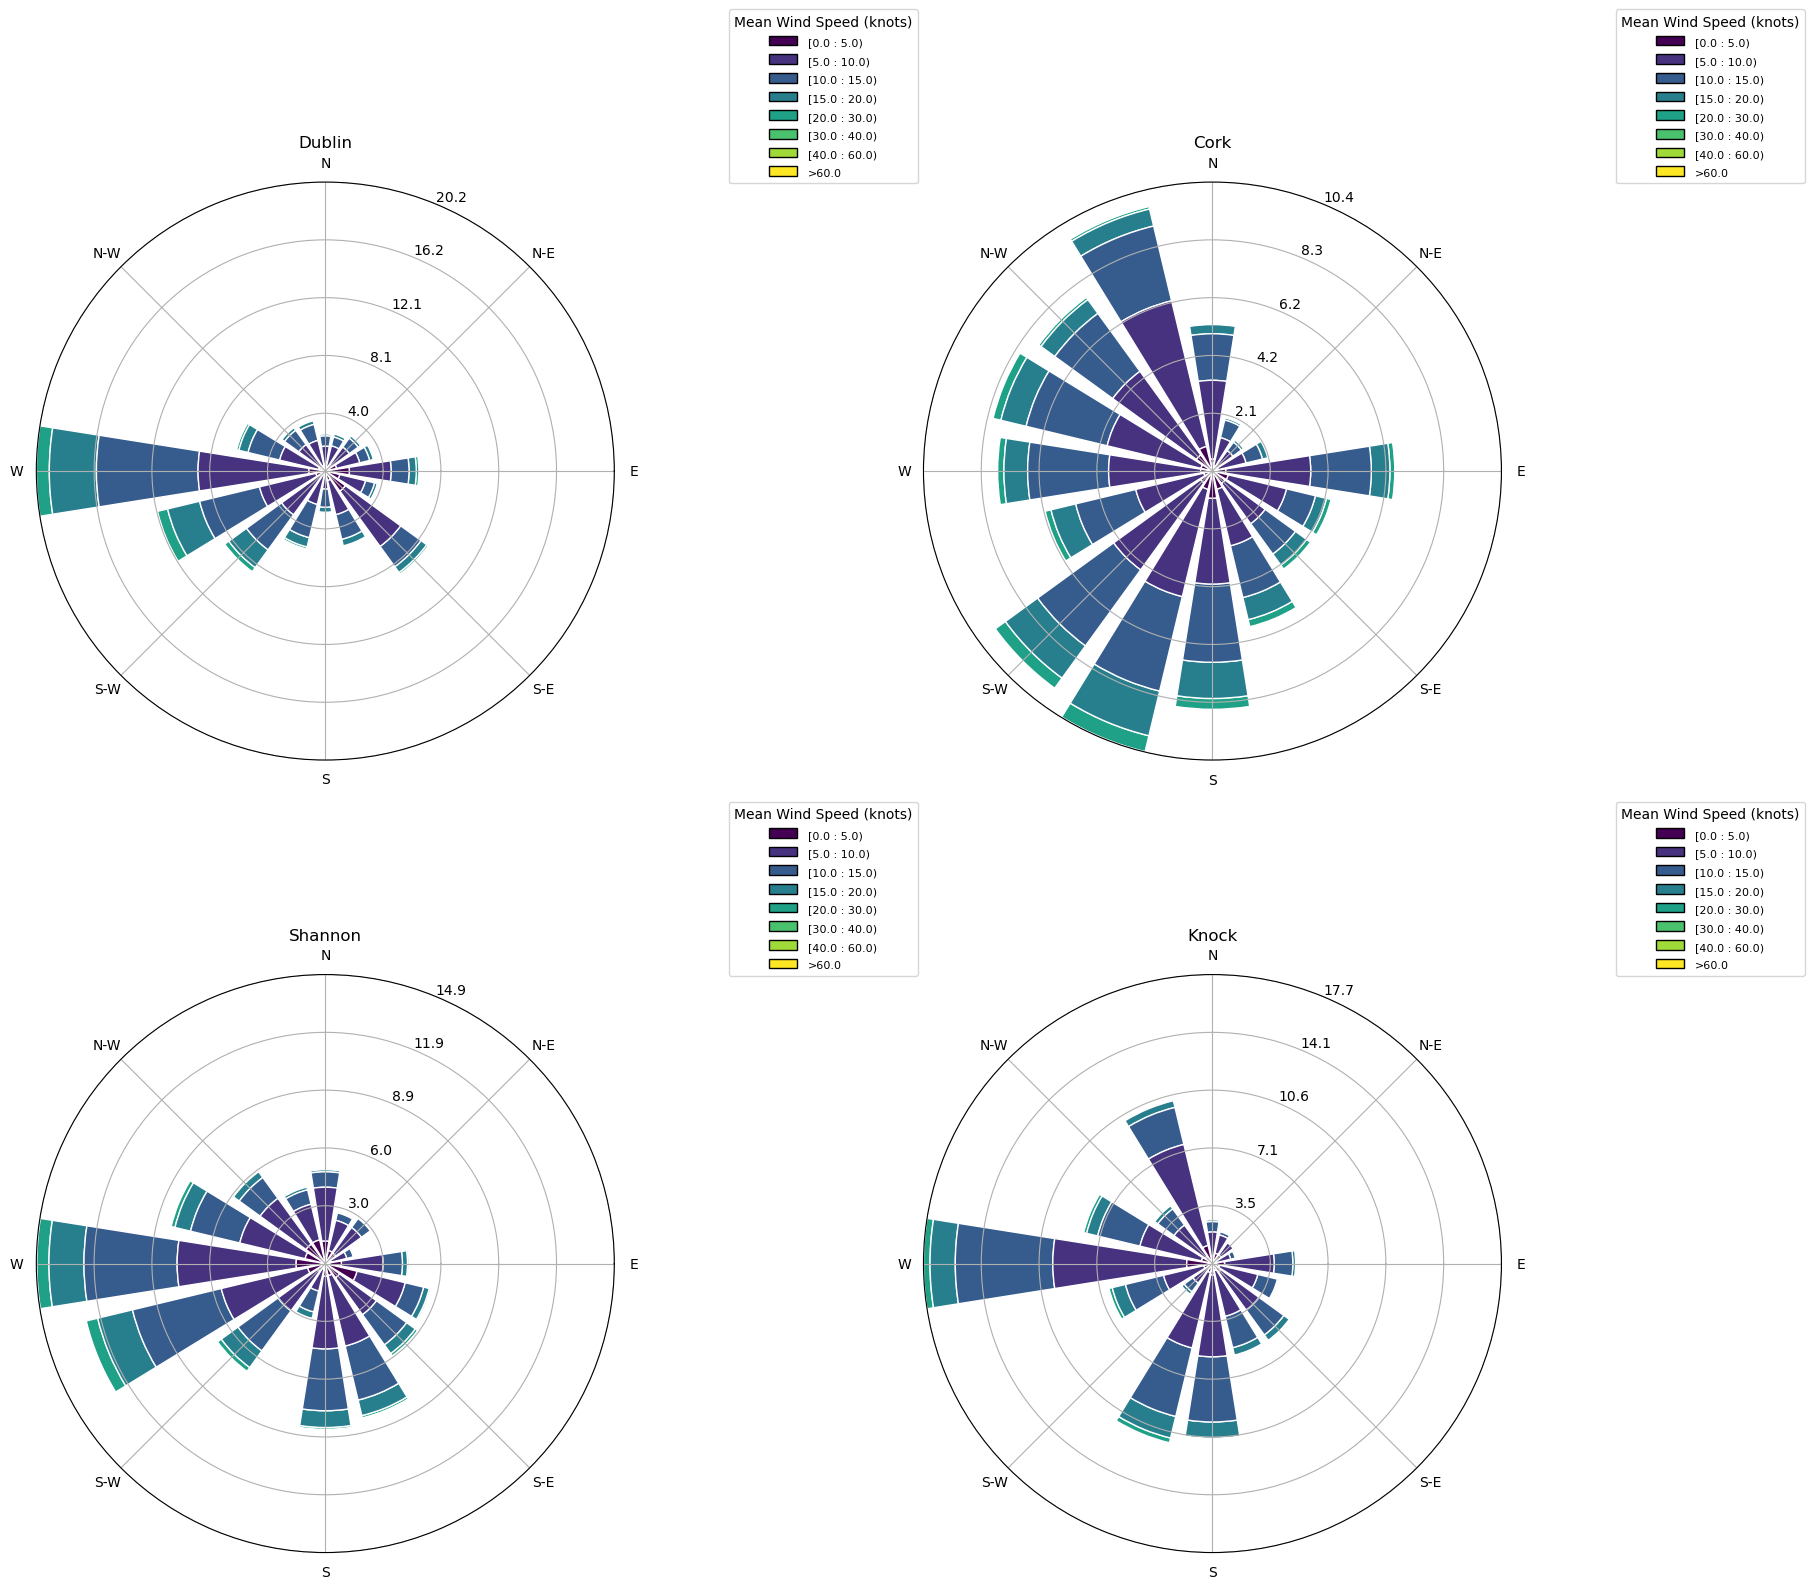

In [105]:
# Wind Rose Plots for Wind Direction and Mean Wind Speed
# See: 


fig = plt.figure(figsize=(18, 16))

airports = ['Dublin', 'Cork', 'Shannon', 'Knock']

for i, airport in enumerate(airports, 1):
    ax = fig.add_subplot(2, 2, i, projection='windrose')
    data = all_airports[all_airports['Airport'] == airport].copy()

    # ensure numeric types and drop invalid rows
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Mean_Wind_Speed(knots)'], errors='coerce')

    mask = directions.notna() & speeds.notna()
    if not mask.any():
        ax.set_title(f"{airport} (no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )

    ax.set_title(f"{airport}")
    ax.set_legend(title="Mean Wind Speed (knots)")
    # move legend outside plot
    # See: https://matplotlib.org/stable/gallery/axes_grid1/windrose_legend_outside.html
    ax.set_legend(title="Mean Wind Speed (knots)", bbox_to_anchor=(1.2, 1))

# plt.savefig('Wind_Rose_Wind_Direction.png')

plt.tight_layout()
plt.show()


__Analysis of Mean Wind Direction(degrees) for Shannon, Dublin, Cork and Knock:__

Cork appears to have a	Strong peak around 220°–240° (southwest winds dominate).

Dublin looks to have strong influence from west winds 

Knock	is	More evenly spread, but slight peak near 180° (southerly winds).

Shannon	 is Similar to Cork, with a strong southwest bias.


Southwest winds are dominant across most airports — consistent with Ireland’s prevailing wind patterns due to Atlantic weather systems.

Knock Airport shows a more diverse wind direction profile, possibly due to its inland and elevated location.

## Seasonal Analysis

Seasonality is central to wind behaviour in Ireland, lets take a quick look at the __monthly mean wind speed by airport.__

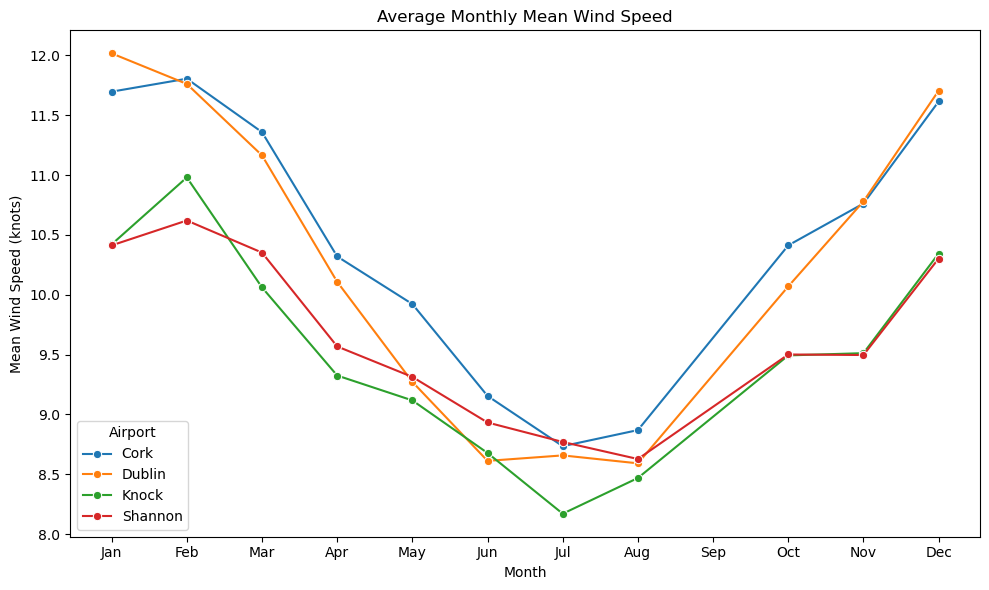

In [118]:
# Ensure Date column is datetime
all_airports['Date'] = pd.to_datetime(all_airports['Date'], errors='coerce', dayfirst=True)

# Extract month
all_airports['Month'] = all_airports['Date'].dt.month

# Convert wind speed to numeric for aggregation
all_airports['Mean_Wind_Speed(knots)'] = pd.to_numeric(all_airports['Mean_Wind_Speed(knots)'], errors='coerce')

monthly = (
    all_airports
    .groupby(['Airport', 'Month'])['Mean_Wind_Speed(knots)']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=monthly,
    x='Month',
    y='Mean_Wind_Speed(knots)',
    hue='Airport',
    marker='o'
)

plt.title('Average Monthly Mean Wind Speed')
plt.xlabel('Month')
plt.ylabel('Mean Wind Speed (knots)')


# Set x-ticks as month names.
# See: https://stackoverflow.com/questions/46263392/add-months-to-xaxis-and-legend-on-a-matplotlib-line-plot

month_names = [calendar.month_abbr[m] for m in range(1, 13)]
plt.xticks(ticks=range(1, 13), labels=month_names)

plt.tight_layout()
plt.show()


All four airports show strong seasonality in wind speeds. Winter shows being the windiest and summer shows being the calmest. Cork and Dublin are generally windier than Knock and Shannon, but the overall pattern is consistent across all locations.

__Investigation on how the wind directions and strenghts of maximum wind gusts at the airports vary by seasons__

Mean wind speed describes typical conditions. However maximum gusts and wind direction are essential for assessing the true operational and safety risks, such as cross winds and turbulence in aviation. 

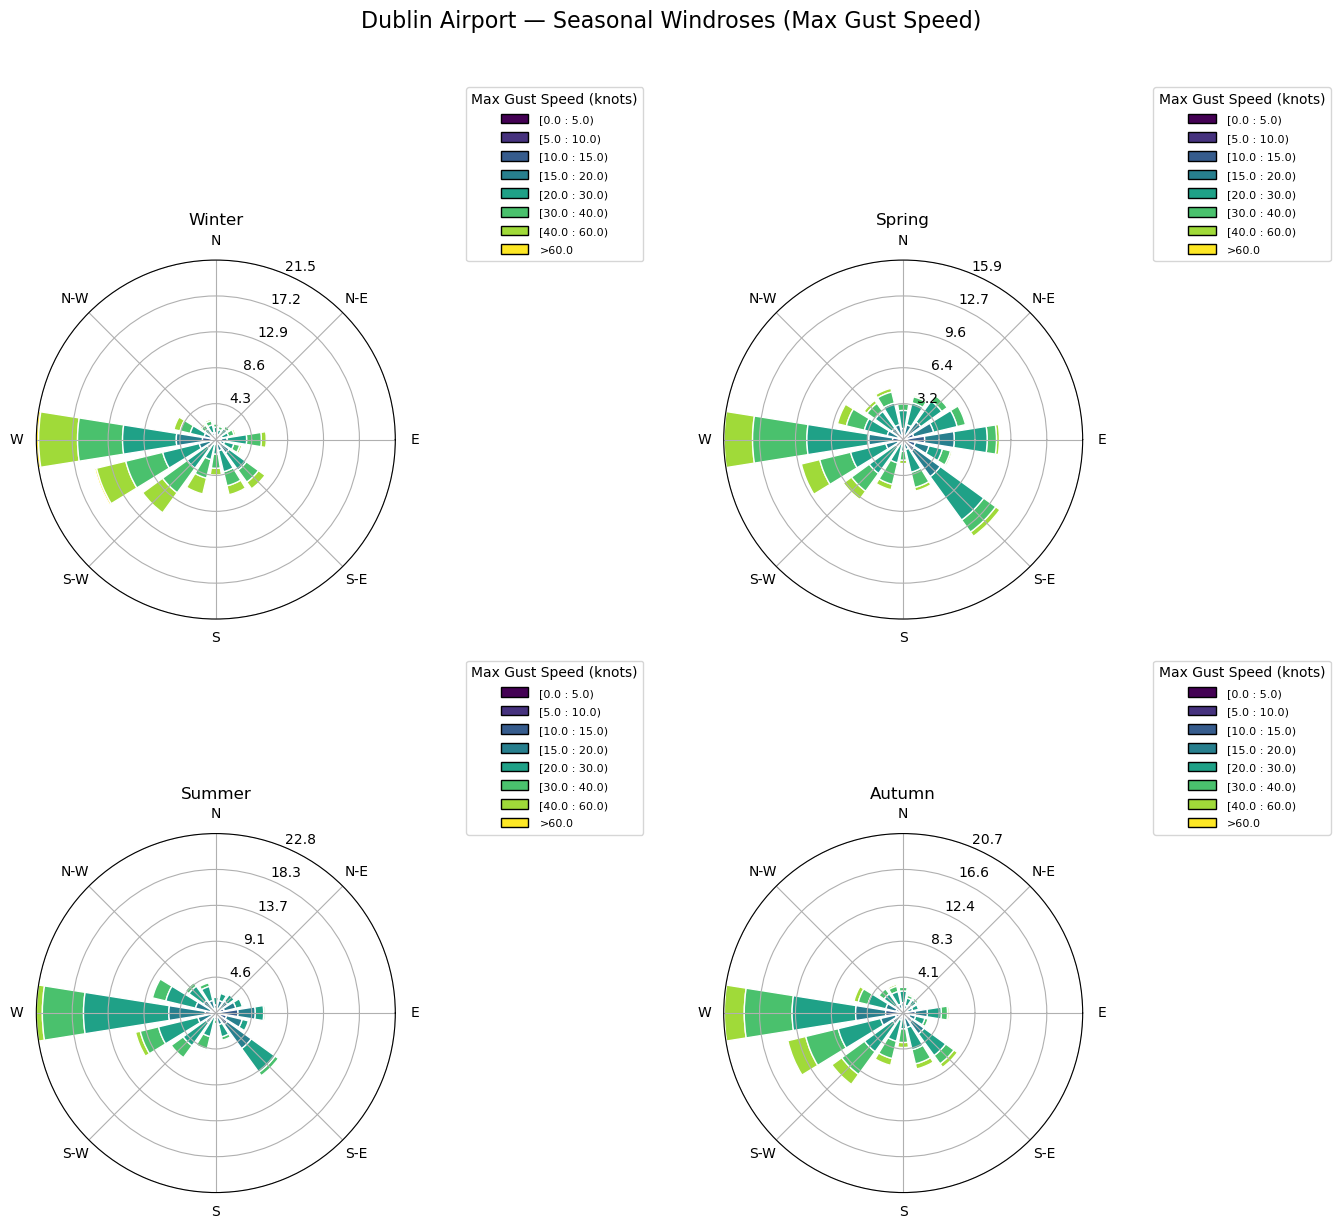

In [119]:
# Windrose for Dublin Airport: Max Gust Speed by Season

seasons = ["Winter", "Spring", "Summer", "Autumn"]
fig = plt.figure(figsize=(14, 12))

for i, season in enumerate(seasons, 1):
    ax = fig.add_subplot(2, 2, i, projection='windrose')
    data = all_airports[(all_airports['Airport'] == 'Dublin') & (all_airports['Season'] == season)].copy()

    # Convert to numeric and drop missing values
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Gust_Speed(knots)'], errors='coerce')
    mask = directions.notna() & speeds.notna()

    # Check for valid data.
    if not mask.any():
        ax.set_title(f"{season}\n(no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )
    ax.set_title(f"{season}", fontsize=12)
    ax.set_legend(title="Max Gust Speed (knots)", bbox_to_anchor=(1.2, 1))

fig.suptitle("Dublin Airport — Seasonal Windroses (Max Gust Speed)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

__Dublin Airport__ 


__Winter__ has the highest gust frequencies and speeds are observed in winter. There is a strong concentration of high gusts from the west and southwest. 

__Spring and Autumn__  demonstrate a similar pattern to winter, but with lower frequencies and maximum gust speeds. The westerly dominance remains, but the distribution is a bit more spread out.

__Summer__ has the lowest frequencies and intensities of maximum gusts. The windrose is less “filled,” indicating calmer conditions overall, but the westerly direction is still the main concentration of winds.

__In summary__  Dublin Airport is most exposed to strong gusts from the west and southwest, especially in winter. Seasonal variation is clear, with winter showing the most severe gusts and summer the mildest. This pattern is typical for Irish airports and highlights the operational challenges during the stormier months.

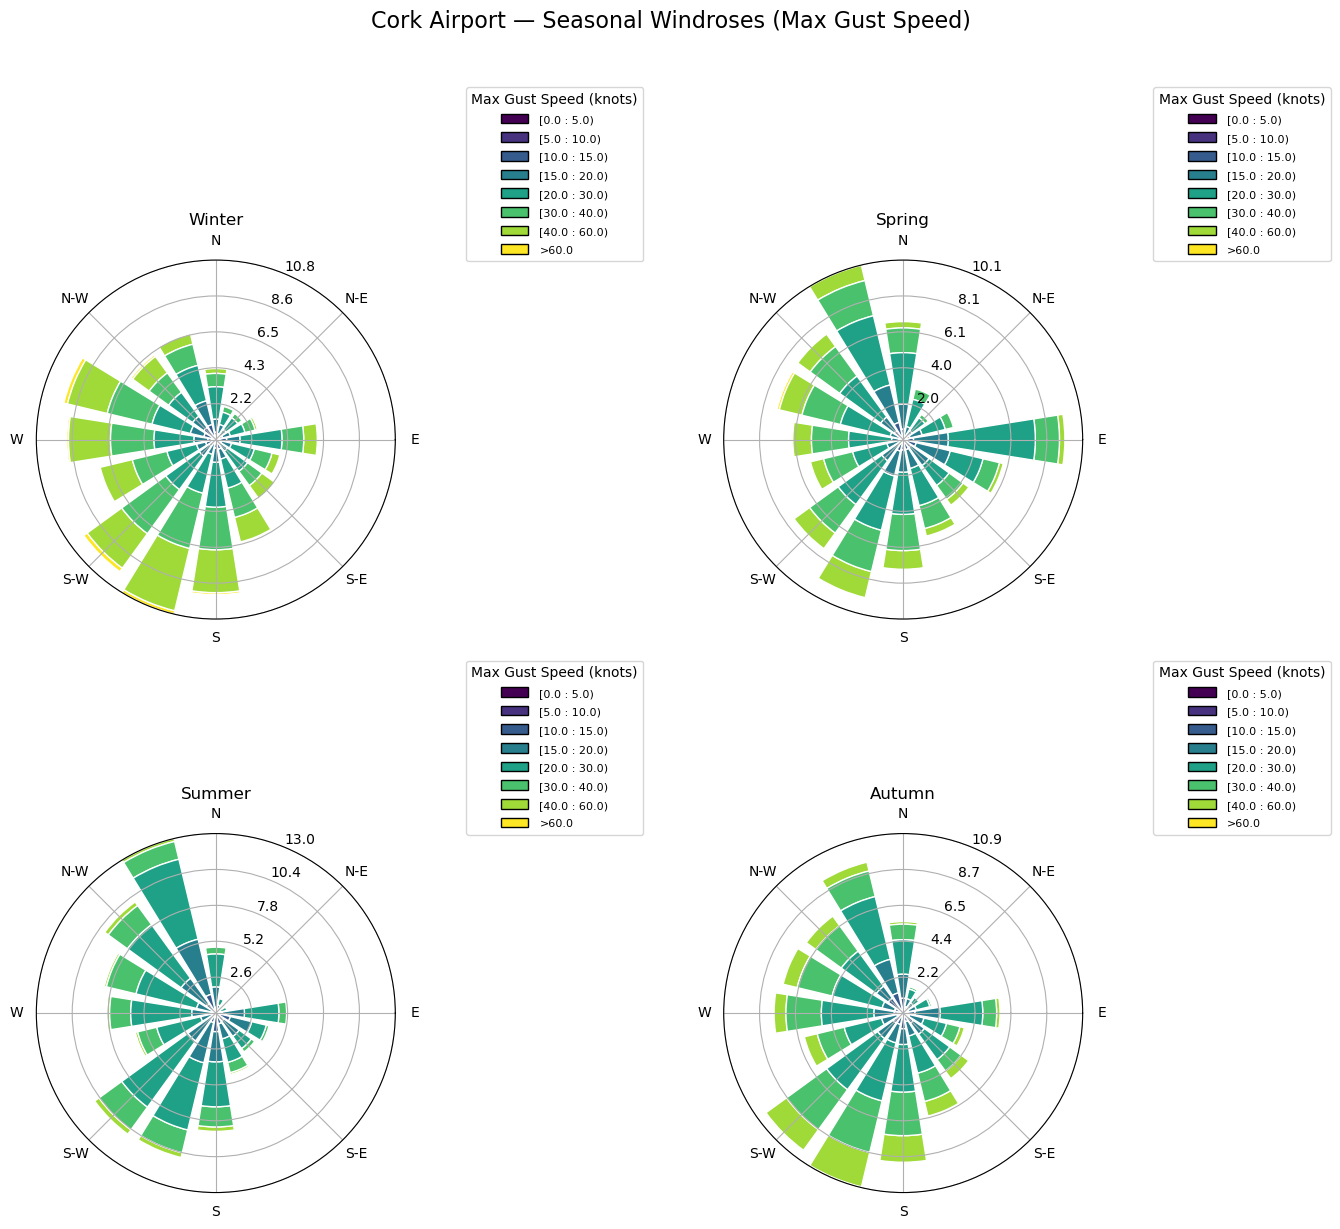

In [120]:
# Windrose for Cork Airport: Max Gust Speed by Season
seasons = ["Winter", "Spring", "Summer", "Autumn"]
fig = plt.figure(figsize=(14, 12))

for i, season in enumerate(seasons, 1):
    ax = fig.add_subplot(2, 2, i, projection='windrose')
    data = all_airports[(all_airports['Airport'] == 'Cork') & (all_airports['Season'] == season)].copy()

    # Convert to numeric and drop missing values
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Gust_Speed(knots)'], errors='coerce')
    mask = directions.notna() & speeds.notna()

    # Check for valid data.
    if not mask.any():
        ax.set_title(f"{season}\n(no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )
    ax.set_title(f"{season}", fontsize=12)
    ax.set_legend(title="Max Gust Speed (knots)", bbox_to_anchor=(1.2, 1))
fig.suptitle("Cork Airport — Seasonal Windroses (Max Gust Speed)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

__Cork Airport__


__Winter__ gusts are frequent and strong, especially from the southwest and west. The windrose is well-filled, indicating a high frequency of strong gusts in these directions.

__Spring__ Gusts remain frequent but are generally less intense than in winter. The southwest and west directions still dominate, but there is a slightly broader spread.

__Summer__ Gusts are less frequent and generally weaker, but there is still a notable presence of strong gusts from the southwest and west. The windrose is less filled, indicating calmer conditions overall.

__Autumn__ Gusts increase again compared to summer, with a pattern similar to winter and spring. The southwest and west remain the dominant directions for strong gusts.


__In Summary__ Cork Airport is most exposed to strong gusts from the southwest and west, especially in winter and autumn. The seasonal variation is clear, with winter and autumn showing the most severe gusts and summer the mildest. 

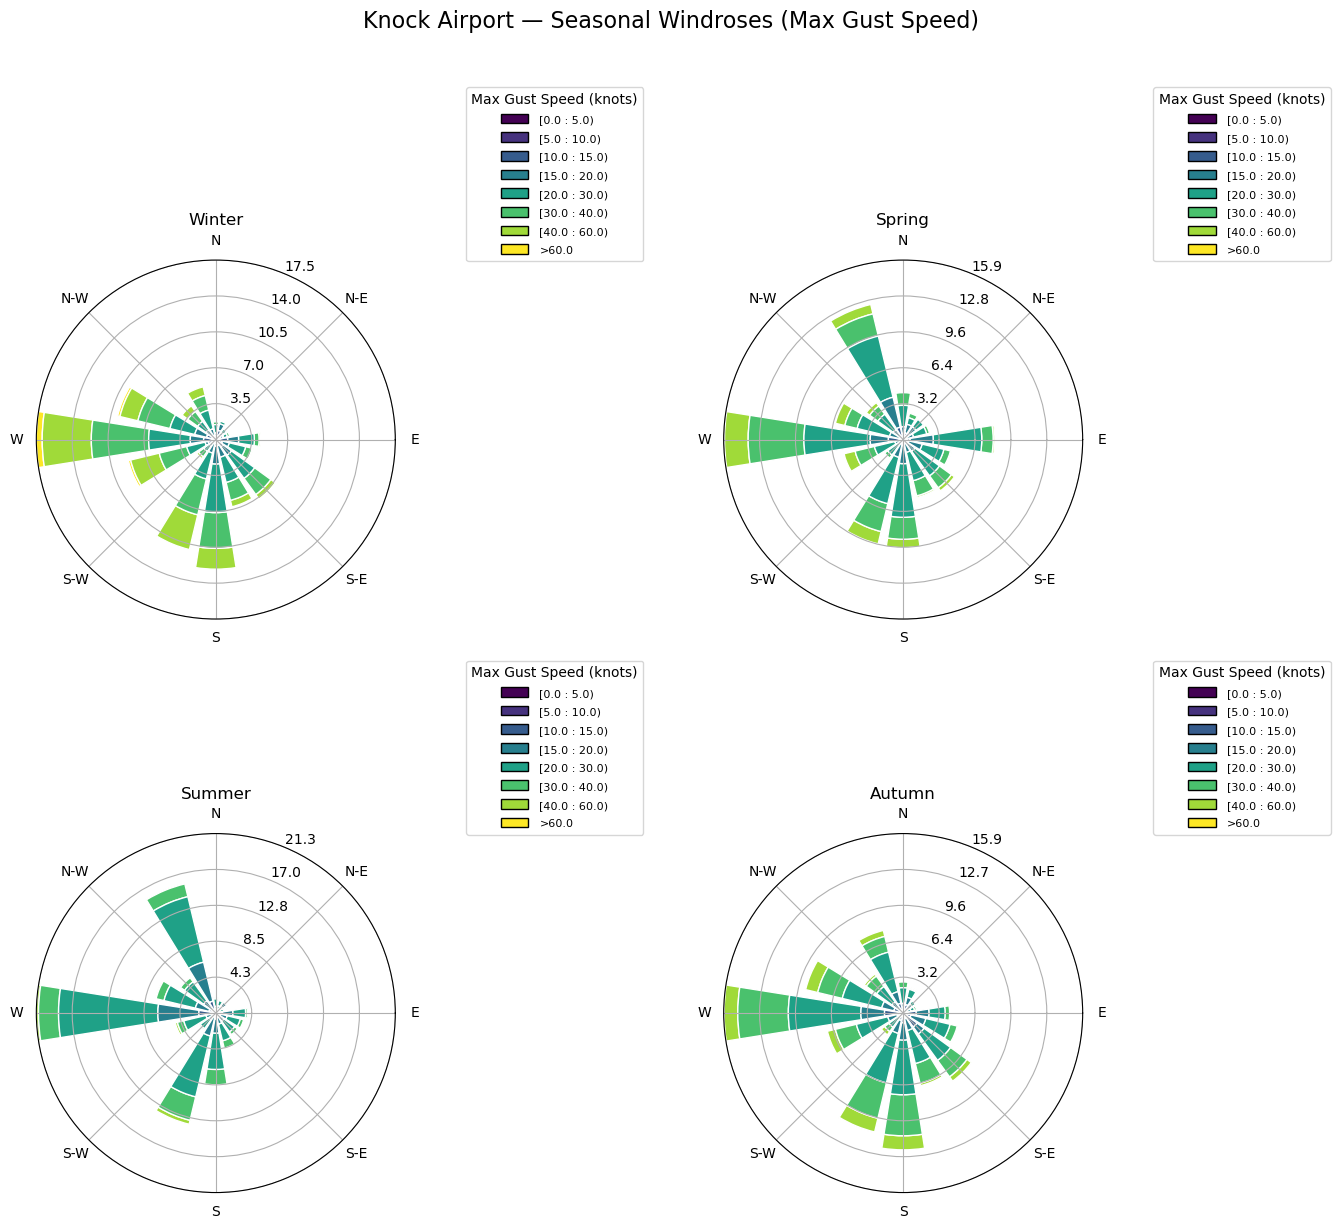

In [121]:
# Plot Windrose for Knock Airport of Max Gust Speed by Season.

seasons = ["Winter", "Spring", "Summer", "Autumn"]
fig = plt.figure(figsize=(14, 12))

for i, season in enumerate(seasons, 1):
    ax = fig.add_subplot(2, 2, i, projection='windrose')
    data = all_airports[(all_airports['Airport'] == 'Knock') & (all_airports['Season'] == season)].copy()

    # Convert to numeric and drop missing values
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Gust_Speed(knots)'], errors='coerce')
    mask = directions.notna() & speeds.notna()

    # Check for valid data.
    if not mask.any():
        ax.set_title(f"{season}\n(no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )   
    ax.set_title(f"{season}", fontsize=12)
    ax.set_legend(title="Max Gust Speed (knots)", bbox_to_anchor=(1.2, 1))
fig.suptitle("Knock Airport — Seasonal Windroses (Max Gust Speed)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

__Knock Airport__


__Winter__ gusts are frequent and strong, especially from the west and northwest. The windrose shows a wide spread, indicating gusts from multiple directions, but the west is dominant.

__Spring__ gusts remain frequent, with the west and northwest still dominant, but the overall intensity is slightly lower than winter. There is a broader spread of directions.

__Summer__ gusts are less frequent and generally weaker, but there is a notable presence of gusts from the north and northwest. The windrose is less filled, indicating calmer conditions overall.

__Autumn__ gusts increase again compared to summer, with a pattern similar to winter and spring. The west and northwest remain the dominant directions for strong gusts.


__In summary__ Knock Airport is exposed to strong gusts from the west and northwest, especially in winter and autumn. The wind direction is more variable than at coastal airports, likely due to its inland and elevated location. Seasonal variation is clear, with winter and autumn showing the most severe gusts and summer the mildest. 

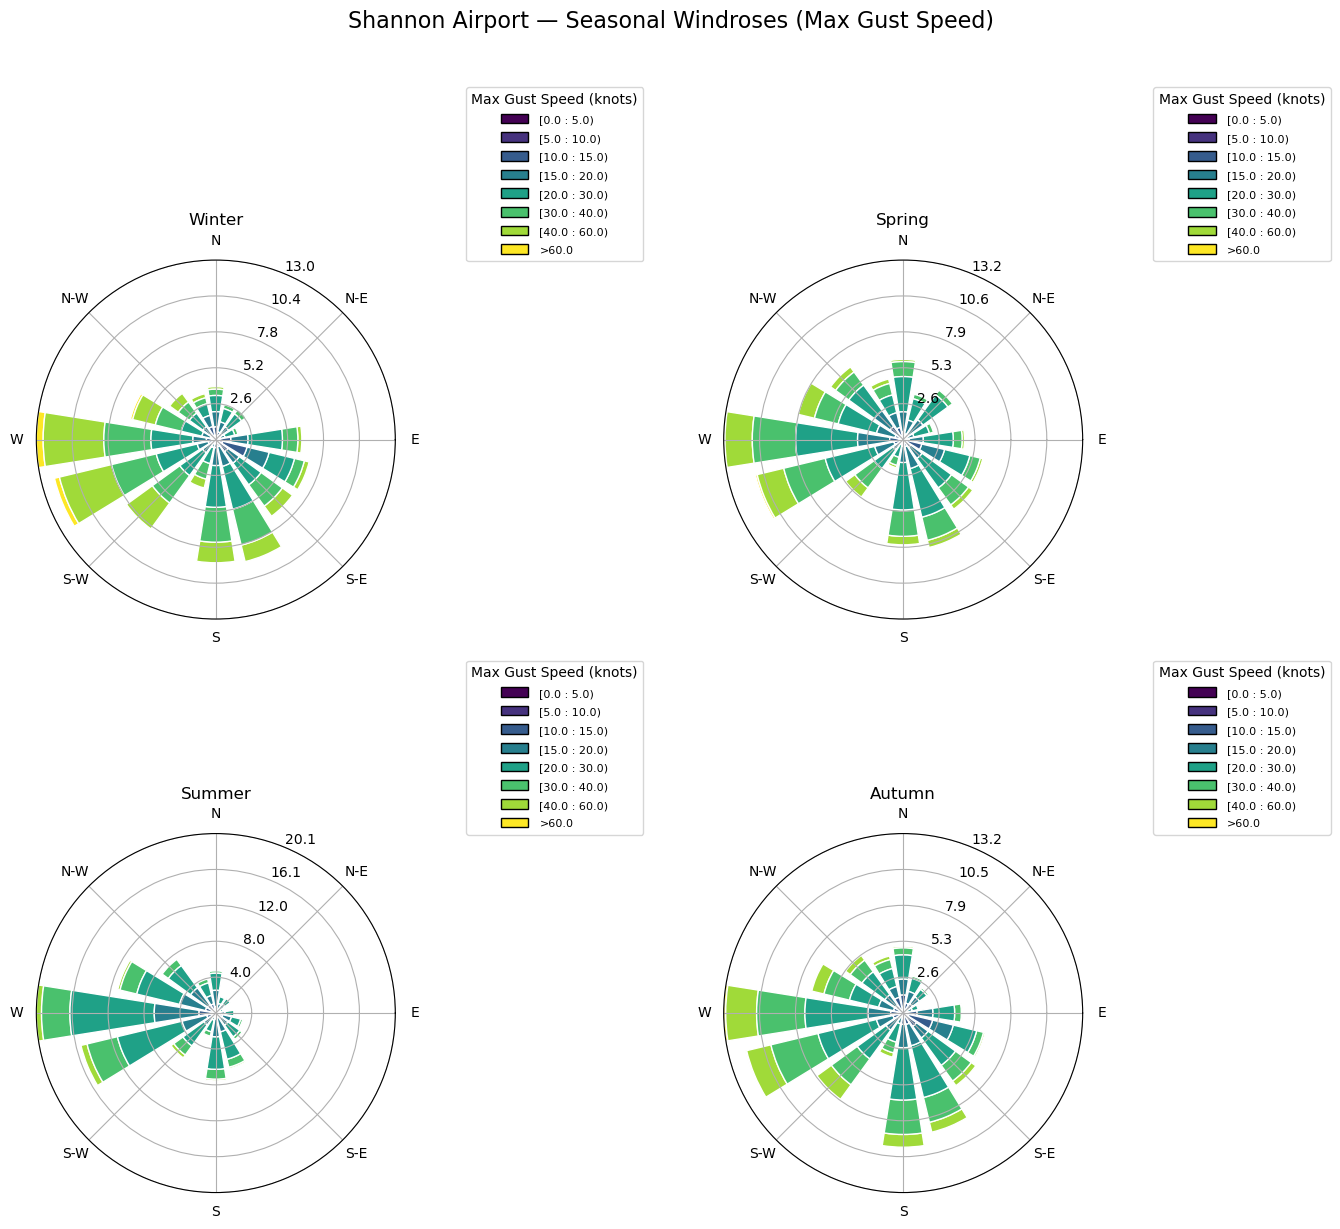

In [122]:
# Plot Windrose for Shannon Airport of Max Gust Speed by Season.

seasons = ["Winter", "Spring", "Summer", "Autumn"]
fig = plt.figure(figsize=(14, 12))

for i, season in enumerate(seasons, 1):
    ax = fig.add_subplot(2, 2, i, projection='windrose')
    data = all_airports[(all_airports['Airport'] == 'Shannon') & (all_airports['Season'] == season)].copy()

    # Convert to numeric and drop missing values
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Gust_Speed(knots)'], errors='coerce')
    mask = directions.notna() & speeds.notna()

    # Check for valid data.
    if not mask.any():
        ax.set_title(f"{season}\n(no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )

    ax.set_title(f"{season}", fontsize=12)
    ax.set_legend(title="Max Gust Speed (knots)", bbox_to_anchor=(1.2, 1))
fig.suptitle("Shannon Airport — Seasonal Windroses (Max Gust Speed)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

__Shannon Airport__

__Winter__ gusts are distributed across many directions, but there is a slight dominance from the west and southwest.
Most gusts are in the lower to mid-speed ranges  The highest frequency of gusts is around 13 knots from the west.

__Spring__ gusts come from a variety of directions, but again, the west and southwest are prominent. The pattern is similar to winter with gust speeds being generally moderate, with the highest frequency around 13 knots from the west-northwest.

__Summer__ gusts see a noticeable increase in both the frequency and intensity of gusts from the west and southwest.
The highest gusts are more frequent, with a maximum frequency of about 20 knots from the west.
This suggests that summer brings stronger and more frequent gusts from the west.

__Autumn__ gusts returns to being more similar to winter and spring, with the west and southwest directions again being dominant.
Gust speeds are moderate, with the highest frequency around 13 knots from the west.


__In Summary__ Shannon Airport experiences its strongest and most frequent wind gusts from the west and southwest, especially during the summer. 

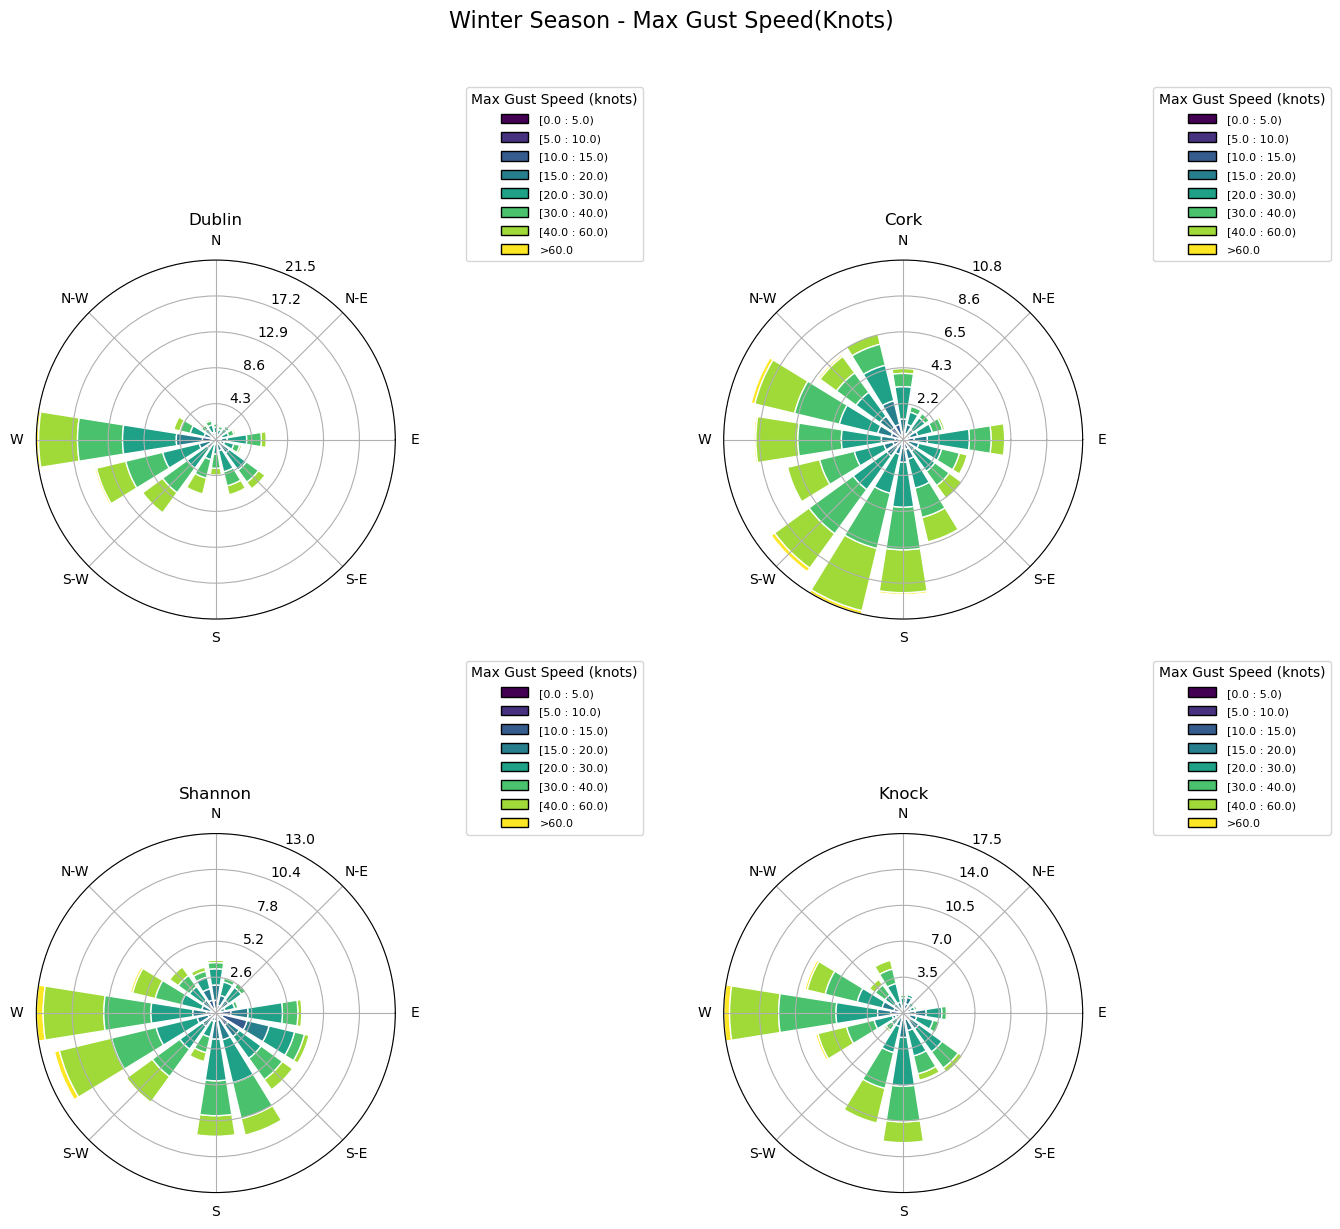

In [123]:
# Plot windrose for all the airports for Winter Months.

airports = ["Dublin", "Cork", "Shannon", "Knock"]
fig = plt.figure(figsize=(14, 12))

for i, airport in enumerate(airports, 1):
    ax = fig.add_subplot(2, 2, i, projection='windrose')
    
    # Filter for all airports and then winter only.
    data = all_airports[
        (all_airports['Airport'] == airport) &
        (all_airports['Season'] == "Winter")
    ].copy()

    # Convert to numeric and drop missing values.
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Gust_Speed(knots)'], errors='coerce')
    mask = directions.notna() & speeds.notna()

    # Check for valid data.
    if not mask.any():
        ax.set_title(f"{airport}\n(no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )

    ax.set_title(f"{airport}", fontsize=12)
    ax.set_legend(title="Max Gust Speed (knots)", bbox_to_anchor=(1.2, 1))

fig.suptitle("Winter Season - Max Gust Speed(Knots)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import pandas as pd
import matplotlib.image as mpimg
# 
# Load Ireland map
img = mpimg.imread("ireland_map.png")
fig = plt.figure(figsize=(10, 14))

# Show base map
ax_map = fig.add_subplot(1, 1, 1)
ax_map.imshow(img)
ax_map.axis("off")
ax_map.set_title("Winter Windroses — Max Gust Speed", fontsize=16, weight='bold')

# Airport pixel positions (calibrated for this image)
airport_positions = {
    "Dublin": (620, 260),
    "Cork": (420, 880),
    "Shannon": (360, 700),
    "Knock": (460, 180)
}

for airport, (x, y) in airport_positions.items():
    data = all_airports[
        (all_airports['Airport'] == airport) &
        (all_airports['Season'] == "Winter")
    ].copy()

    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Gust_Speed(knots)'], errors='coerce')
    mask = directions.notna() & speeds.notna()

    if not mask.any():
        continue

    # Create inset windrose
    inset_ax = fig.add_axes([0, 0, 0.18, 0.18], projection='windrose')
    inset_ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )
    inset_ax.set_title(airport, fontsize=10, weight='bold')
    inset_ax.set_legend(title="knots", bbox_to_anchor=(1.2, 1))

    # Position inset on map
    inset_ax.set_position([
        x / img.shape[1] - 0.09,
        1 - (y / img.shape[0]) - 0.09,
        0.18,
        0.18
    ])

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'ireland_map.png'

Histogram 

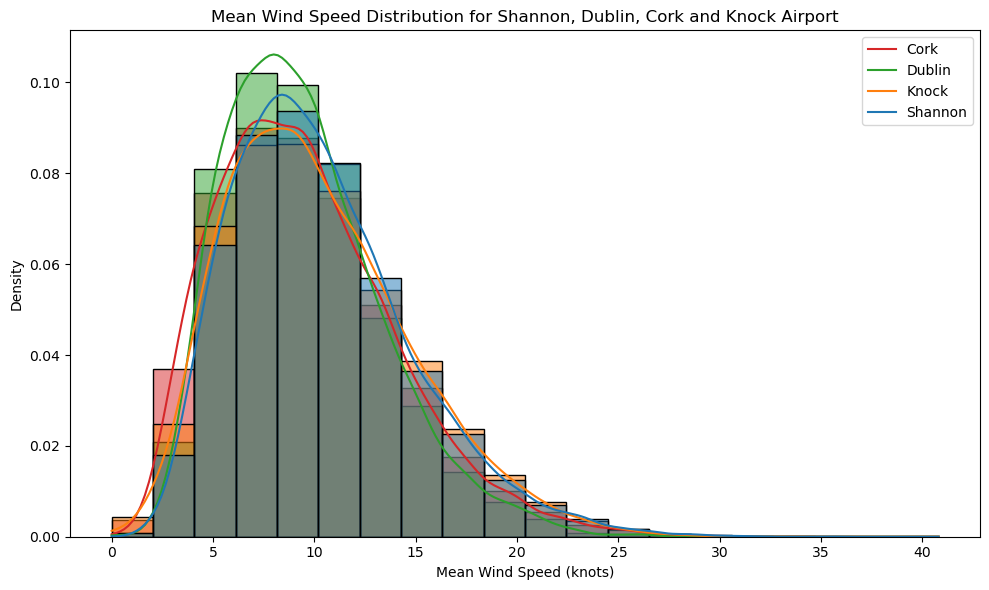

In [ ]:
# Plot Histogram of Mean Wind Speed for All Airports

# add
 

mean_wind_speeds = all_airports.pivot(columns='Airport', values='Mean_Wind_Speed(knots)')


plt.figure(figsize=(10, 6))
sns.histplot(data=mean_wind_speeds, bins=20, kde=True, stat="density", common_norm=False)
plt.title('Mean Wind Speed Distribution for Shannon, Dublin, Cork and Knock Airport')
plt.xlabel('Mean Wind Speed (knots)')
plt.ylabel('Density')
plt.legend(mean_wind_speeds.columns)
plt.tight_layout()

# plt.savefig('Mean_Wind_Speed_Distribution_All_Airports.png')

plt.show()

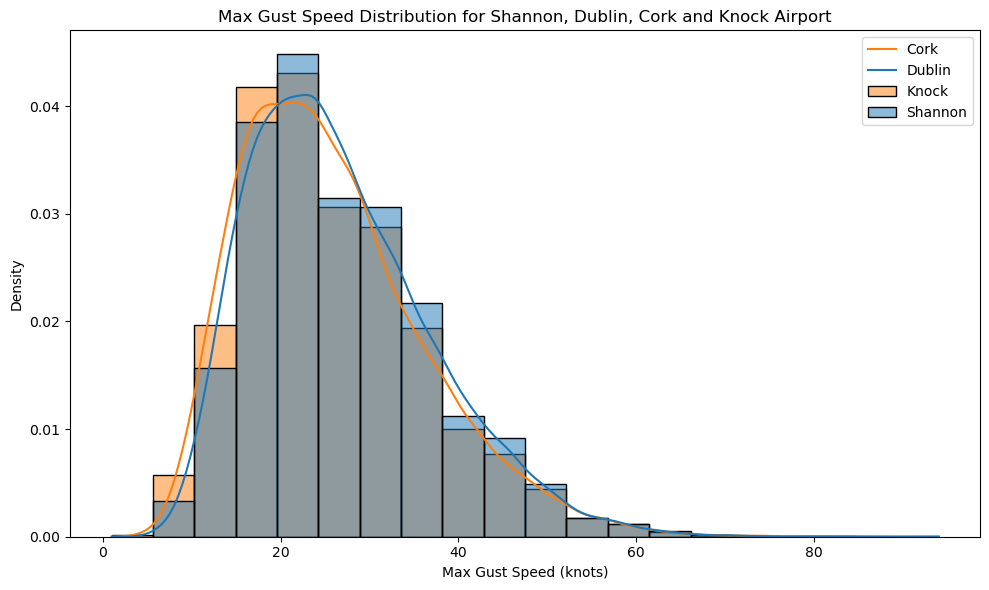

In [ ]:
# Plot histogram of Max Gust Speed for All Airports

max_gust_speeds = all_airports.pivot(columns='Airport', values='Max_Gust_Speed(knots)')
plt.figure(figsize=(10, 6))
sns.histplot(data=max_gust_speeds, bins=20, kde=True, stat="density", common_norm=False)


plt.title('Max Gust Speed Distribution for Shannon, Dublin, Cork and Knock Airport')
plt.xlabel('Max Gust Speed (knots)')
plt.ylabel('Density')
plt.legend(max_gust_speeds.columns)
plt.tight_layout()

# plt.savefig('Max_Gust_Speed_Distribution_All_Airports.png')

plt.show()


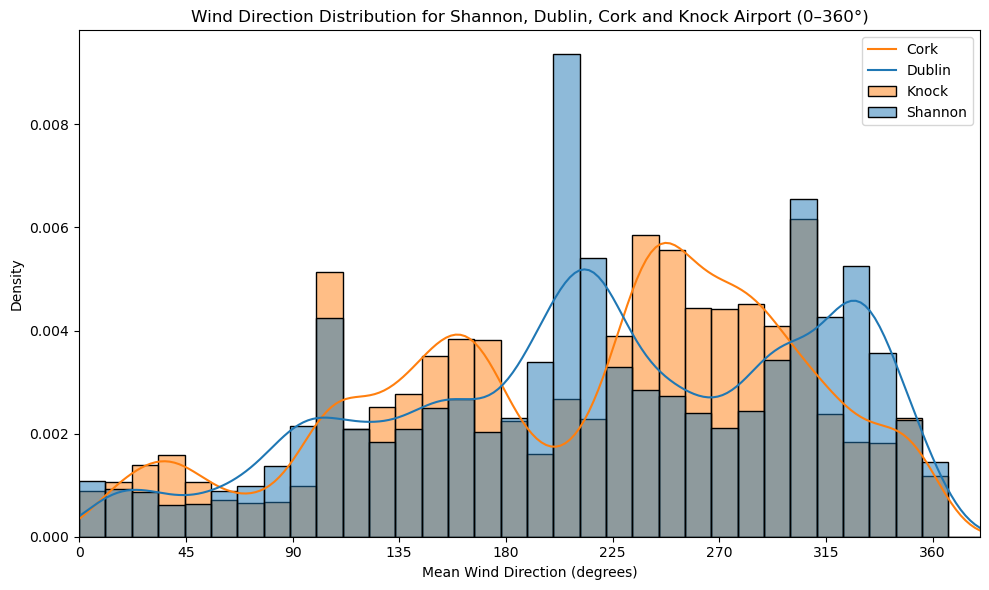

In [ ]:
# Plot histogram of Mean Wind Direction(degrees) for All Airports

wind_directions = all_airports.pivot(columns='Airport', values='Mean_Wind_Direction(degrees)')

plt.figure(figsize=(10, 6))
sns.histplot(data=wind_directions, bins=36, kde=True, stat="density", common_norm=False)
plt.title('Wind Direction Distribution for Shannon, Dublin, Cork and Knock Airport (0–360°)')
plt.xlabel('Mean Wind Direction (degrees)')
plt.ylabel('Density')

# Extending x-axis slightly beyond 360 to accommodate tick marks.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html

plt.xlim(0, 380) 

# Set x-ticks from 0 to 360 at intervals of 45 degrees so easier to read.

plt.xticks(range(0, 361, 45)) 

plt.legend(wind_directions.columns)
plt.tight_layout()

# plt.savefig('Mean_Wind_Direction_Distribution_All_Airports.png')

plt.show()


An


Airport	Color	Observations
Cork	Orange	Strong peak around 220°–240° (southwest winds dominate).
Dublin	Blue	Broad distribution, but notable density around 200°–240°.
Knock	Black	More evenly spread, but slight peak near 180° (southerly winds).
Shannon	Gray	Similar to Cork, with a strong southwest bias.


Southwest winds are dominant across most airports — consistent with Ireland’s prevailing wind patterns due to Atlantic weather systems.

Knock Airport shows a more diverse wind direction profile, possibly due to its inland and elevated location.

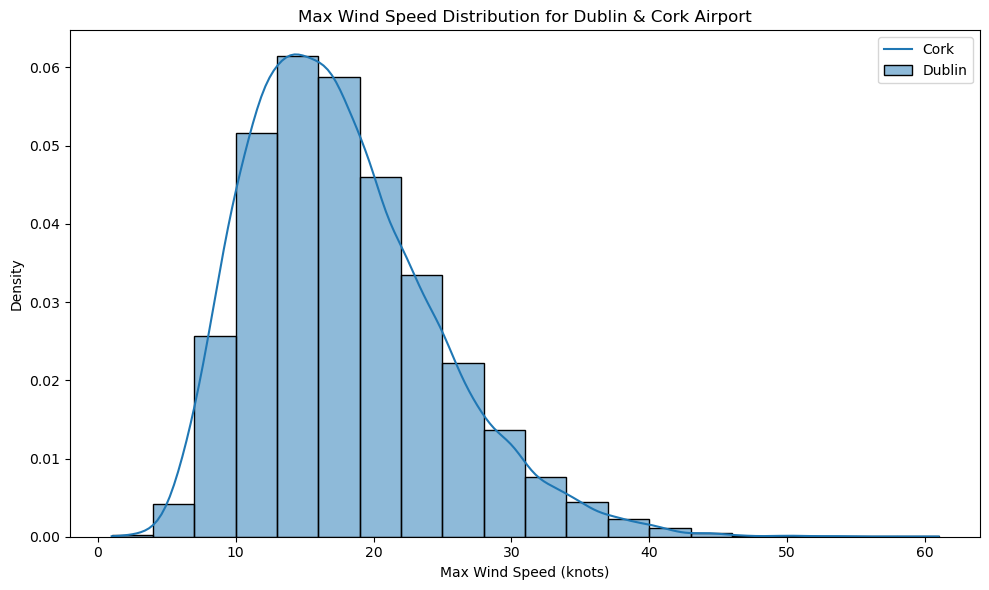

In [ ]:
# Plot histogram of Max Wind Speed for cork and Dublin Airport

max_wind_speeds = all_airports.pivot(columns='Airport', values='Max_Wind_Speed(knots)')

plt.figure(figsize=(10, 6))
sns.histplot(data=max_wind_speeds, bins=20, kde=True, stat="density", common_norm=False)

plt.title('Max Wind Speed Distribution for Dublin & Cork Airport') 
plt.xlabel('Max Wind Speed (knots)')
plt.ylabel('Density')
plt.legend(max_wind_speeds.columns)
plt.tight_layout()

# plt.savefig('Max_Wind_Speed_Distribution_Dublin_Cork_Airports.png')

plt.show()

__Analysis of Max Wind Speed for Cork and Dublin:__

Both Cork and Dublin airport show their highest density between 10 and 20 knots, with both their modal wind speed being around 14-16 knots. This would suggest that the typical maximun daily wind speeds are generally moderate at both locations. The distributionsa re positively skewed, most days see moderate winds and a samll amount of days see high wind days. 

Cork experiences more extreme wind events, they extend beyond 40-50 knots and while Dublin also experiences some extremes they are usually below 30-35 knots. It would be fair to say that Cork Airport is more exposed to severe wind events, and this is more than likely due to its position on the West of Ireland, close to the Atlantic Ocean. Cross winds of 35-40 knots may opertational risks of delays or cancelations of flights more likely to happen at Cork Airport rather than Dublin Airport, but almost only on days with extreme wind conditions.


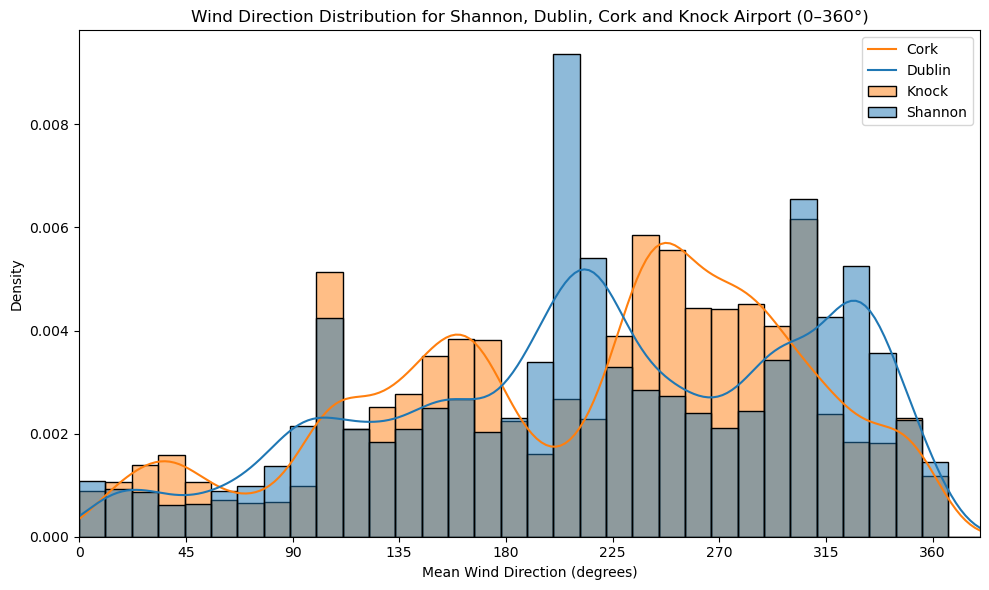

In [ ]:
# Plot histogram of Mean Wind Direction(degrees) for All Airports

wind_directions = all_airports.pivot(columns='Airport', values='Mean_Wind_Direction(degrees)')

plt.figure(figsize=(10, 6))
sns.histplot(data=wind_directions, bins=36, kde=True, stat="density", common_norm=False)
plt.title('Wind Direction Distribution for Shannon, Dublin, Cork and Knock Airport (0–360°)')
plt.xlabel('Mean Wind Direction (degrees)')
plt.ylabel('Density')

# Extending x-axis slightly beyond 360 to accommodate tick marks.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html

plt.xlim(0, 380) 

# Set x-ticks from 0 to 360 at intervals of 45 degrees so easier to read.

plt.xticks(range(0, 361, 45)) 

plt.legend(wind_directions.columns)
plt.tight_layout()

# plt.savefig('Mean_Wind_Direction_Distribution_All_Airports.png')

plt.show()


Histogram doesnt give good insight for 360 degrees win d direction data - look at windrose

Windrose documentation

https://python-windrose.github.io/windrose/usage-output.html

__Analysis of Mean Wind Direction(degrees) for Shannon, Dublin, Cork and Knock:__

Cork appears to have a	Strong peak around 220°–240° (southwest winds dominate).

Dublin looks to have strong influence from west winds 

Knock	is	More evenly spread, but slight peak near 180° (southerly winds).

Shannon	 is Similar to Cork, with a strong southwest bias.


Southwest winds are dominant across most airports — consistent with Ireland’s prevailing wind patterns due to Atlantic weather systems.

Knock Airport shows a more diverse wind direction profile, possibly due to its inland and elevated location.

Windrose documentation

https://python-windrose.github.io/windrose/usage-output.html

C:\Users\laura\AppData\Local\Temp\ipykernel_14924\132792426.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


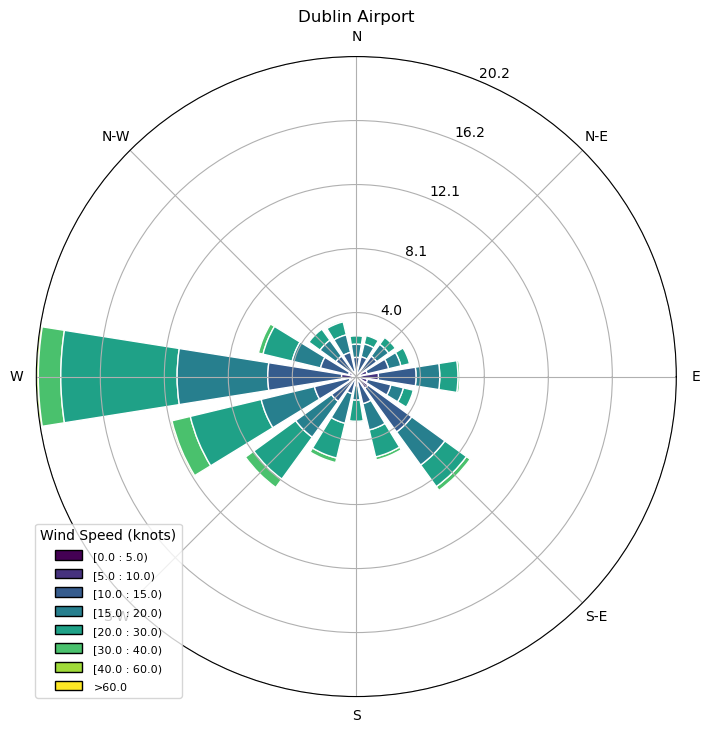

In [ ]:
from windrose import WindroseAxes

# Create Wind Rose for Dublin Airport


dublin = all_airports[all_airports['Airport'] == 'Dublin'].copy()

# Filter for one airport and make a copy
dublin = all_airports[all_airports['Airport'] == 'Dublin'].copy()

# Convert to numeric (coerce invalid strings to NaN) and drop missing values
directions = pd.to_numeric(dublin['Mean_Wind_Direction(degrees)'], )
speeds = pd.to_numeric(dublin['Max_Wind_Speed(knots)'], )

mask = directions.notna() & speeds.notna()
directions = directions[mask].astype(float) % 360  # ensure numeric and 0-360 range
speeds = speeds[mask].astype(float)

fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)

ax.bar(
    directions,
    speeds,
    normed=True,
    opening=0.8,
    edgecolor='white',
    bins=[0, 5, 10, 15, 20, 30, 40, 60]
)

ax.set_title("Dublin Airport")
ax.set_legend(title="Wind Speed (knots)")

plt.tight_layout()

# plt.savefig('Wind_Rose_Dublin_Airport.png')

plt.show()


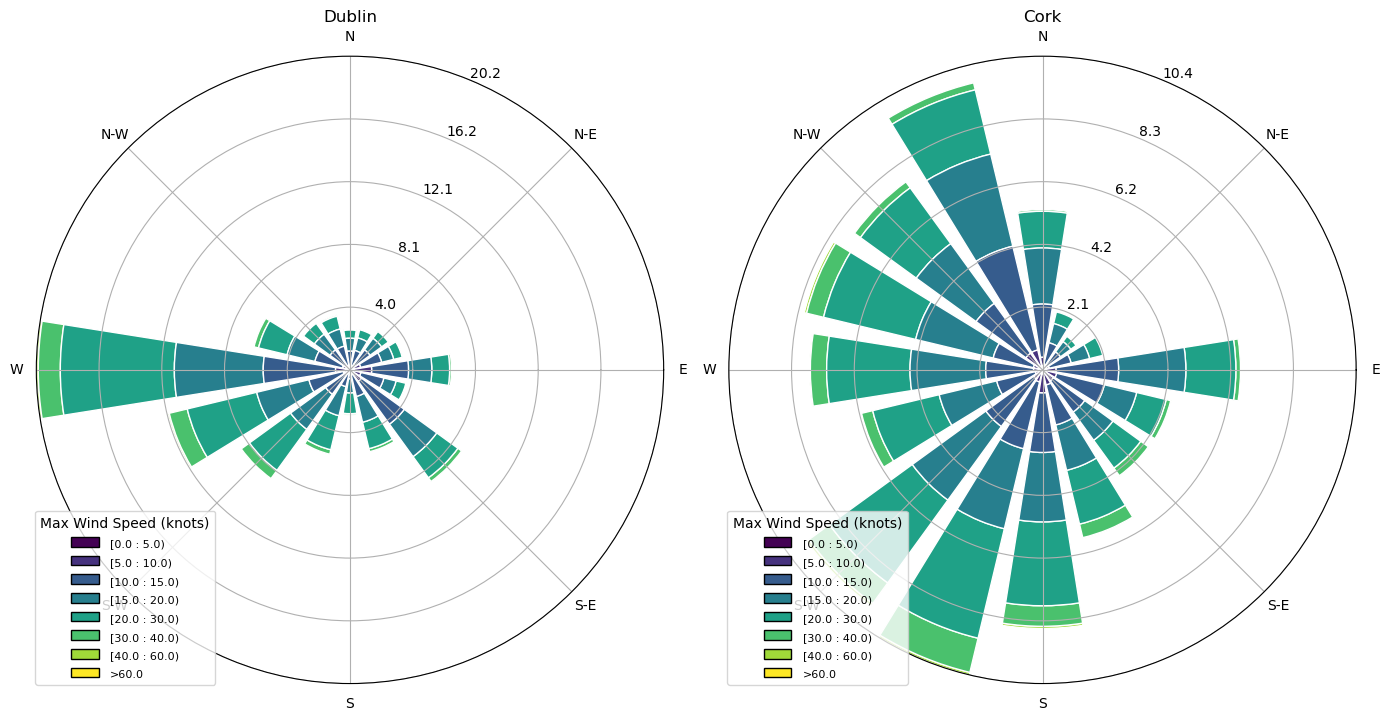

In [ ]:
fig = plt.figure(figsize=(14, 7))

airports = ['Dublin', 'Cork']

for i, airport in enumerate(airports, 1):
    ax = fig.add_subplot(1, 2, i, projection='windrose')
    data = all_airports[all_airports['Airport'] == airport].copy()

    # ensure numeric types and drop invalid rows
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Wind_Speed(knots)'], errors='coerce')

    mask = directions.notna() & speeds.notna()
    if not mask.any():
        ax.set_title(f"{airport} (no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )

    ax.set_title(f"{airport}")
    ax.set_legend(title="Max Wind Speed (knots)")

# plt.savefig('Wind_Rose_Wind_Direction_Dublin_Cork_Airports.png')

plt.tight_layout()
plt.show()


__Dublin Airport/Cork Airport Wind Direction vs Max Wind Speed Analysis:__ 

Looking at this Windrose, its clear to see Dublin Airport shows a strong dominance of west and south west winds. The higher Knot speeds can be associated with the Atlantic airflow coming from the west.

Cork Airport shows a range of different directions and a much greater freaquency of strong winds coming in from the southwest, highlighting the exposure to the Atlantic Coast.


lets looks at seasonal data - look at code here - not loading thinking linked to month not parse correctly 